## __Desafio Vagner Gava - Minha Rede Neural vs Keras TensorFlow__

por Caio Azevedo, 12 de junho de 2021

__Objetivos__:

- Criar problemas de __classificação multiclasse__
- Levantar problemas de __classificação binária__ na literatura (similares ao da dissertação)
- Confrontar as implementações, customizada (minha rede neural) e a biblioteca python __keras__.
- O critério de avaliação de desempenho serão a __acurácia__ e inspeção visual__ em alguns casos.

[0. Imports e Configurações](#0.-Imports-e-Configurações)

[1. Datasets artificiais](#1.-Datasets-artificiais)
- [1. 4 Multiclasses blobs](#1.-4-Multiclasses-blobs)
   - [4 Multiclasses: minha rede](#4-Multiclasses:-minha-rede)
   - [4 Multiclasses: keras](#4-Multiclasses:-keras)
- [2. 4 Multiclasses classification](#2.-4-Multiclasses-classification)
   - [4 Multiclasses: minha rede](#4-Multiclasses-classification:-minha-rede)
   - [4 Multiclasses: keras](#4-Multiclasses-classification:-keras)   
- [3. Iris Dataset](#3.-Iris-Dataset)
   - [3. Iris Dataset: minha rede](#3.-Iris-Dataset:-minha-rede)
   - [3. Iris Dataset: keras](#3.-Iris-Dataset:-keras)   


[2. Datasets da litaratura](#2.-Datasets-da-literatura)
- [Proposta de análise de importancia das features baseado na variância](#Proposta-de-análise-de-importancia-das-features-baseado-na-variância.)
- [2.1 Datasets da literatura: minha rede](#2.1-Datasets-da-literatura:-minha-rede)
- [2.2 Datasets da literatura: keras](#2.2-Datasets-da-literatura:-keras)

# 0. Imports e Configurações

In [1]:
# Minha rede
import Rede_Neural as rna
from Rede_Neural import NeuralNetwork
from Rede_Neural import Layer

# Keras 
from keras.models import Sequential
from keras.layers import Dense

# Geração dos datasets fictícios e visualização de dados
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs, make_circles, make_moons, make_classification
from utils import plot

# Formatação e pré-processamento dos datasets 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Avaliação de desempenho das redes neurais
from sklearn.metrics import accuracy_score

# Manipulação dos dados e funções auxiliares
import numpy as np
import pandas as pd
import os, sys

%matplotlib inline

# 1. Datasets artificiais

## 1. 4 Multiclasses blobs

(400, 2) (400, 1)


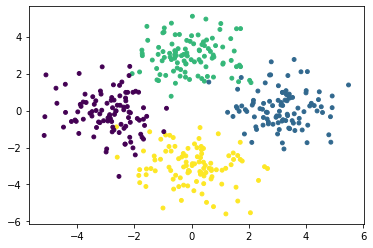

In [2]:
x, y = make_blobs(n_samples=400, n_features=2, centers=[(-3, 0), (3, 0), (0, 3), (0, -3)], random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap=plt.cm.viridis)

In [3]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::70])

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


## 4 Multiclasses: minha rede

epoch:    0/1000 loss_train: 2.28966658 + 0.00000000 = 2.28966658 loss_val = 2.28966658
epoch:  250/1000 loss_train: 0.13303482 + 0.00000000 = 0.13303482 loss_val = 0.13303482
epoch:  500/1000 loss_train: 0.10249015 + 0.00000000 = 0.10249015 loss_val = 0.10249015
epoch:  750/1000 loss_train: 0.09237414 + 0.00000000 = 0.09237414 loss_val = 0.09237414
epoch: 1000/1000 loss_train: 0.08713073 + 0.00000000 = 0.08713073 loss_val = 0.08713073
Acurácia: 97.00%


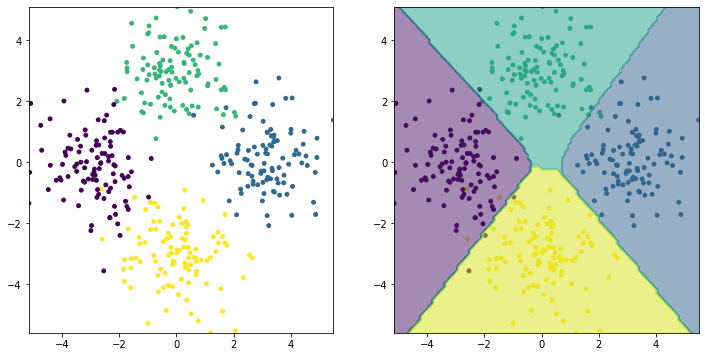

In [4]:
input_dim, output_dim = x.shape[1], y_onehot.shape[1]

#configuração da rede - problema de classificação multiclasse (binary_cross_entropy)
nn = NeuralNetwork(cost_func = rna.softmax_neg_log_likelihood, learning_rate = 1e-1)
nn.layers.append(Layer(input_dim=input_dim, output_dim=3,activation=rna.relu)) # tanh tb serve
nn.layers.append(Layer(input_dim=3, output_dim=output_dim,activation=rna.linear)) 
nn.fit(x, y_onehot, epochs=1000, verbose=250) #porque 10000 epochs ? tentativa e erro !! 

y_pred = np.argmax(nn.predict(x), axis=1)
print('\033[1m' + 'Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)) + '\033[0m')

plot.classification_predictions(x, y, is_binary=False, nn=nn)

## 4 Multiclasses: keras
ref. https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

ref. https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [5]:
model = Sequential()
model.add(Dense(12, input_dim=input_dim, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(output_dim, activation='softmax'))

In [6]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# fit the keras model on the dataset
model.fit(x, y_onehot, epochs=1500, batch_size=10)

Epoch 1/1500
40/40 [==============================] - 25s 1ms/step - loss: 1.4991 - accuracy: 0.2424
Epoch 2/1500
40/40 [==============================] - 0s 1ms/step - loss: 1.1530 - accuracy: 0.4237
Epoch 3/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.9411 - accuracy: 0.5837
Epoch 4/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.7620 - accuracy: 0.6802
Epoch 5/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.6418 - accuracy: 0.7576
Epoch 6/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.5457 - accuracy: 0.8915
Epoch 7/1500
40/40 [==============================] - 0s 975us/step - loss: 0.4604 - accuracy: 0.9367
Epoch 8/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.3741 - accuracy: 0.9632
Epoch 9/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.9547
Epoch 10/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.2776 - accuracy: 0.9

40/40 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9880
Epoch 82/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9696
Epoch 83/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0692 - accuracy: 0.9763
Epoch 84/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0771 - accuracy: 0.9804
Epoch 85/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9640
Epoch 86/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9819
Epoch 87/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0671 - accuracy: 0.9735
Epoch 88/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0912 - accuracy: 0.9570
Epoch 89/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0800 - accuracy: 0.9667
Epoch 90/1500
40/40 [==============================] - 0s 994us/step - loss: 0.0855 - accuracy: 0.9670
Ep

40/40 [==============================] - 0s 963us/step - loss: 0.0603 - accuracy: 0.9795
Epoch 161/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.9634
Epoch 162/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9683
Epoch 163/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0684 - accuracy: 0.9722
Epoch 164/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9660
Epoch 165/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0458 - accuracy: 0.9820
Epoch 166/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9621
Epoch 167/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9669
Epoch 168/1500
40/40 [==============================] - 0s 965us/step - loss: 0.0704 - accuracy: 0.9661
Epoch 169/1500
40/40 [==============================] - 0s 915us/step - loss: 0.0544 - accura

40/40 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9724
Epoch 241/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 0.9633
Epoch 242/1500
40/40 [==============================] - 0s 970us/step - loss: 0.0663 - accuracy: 0.9712
Epoch 243/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 0.9770
Epoch 244/1500
40/40 [==============================] - 0s 979us/step - loss: 0.0975 - accuracy: 0.9519
Epoch 245/1500
40/40 [==============================] - 0s 989us/step - loss: 0.0538 - accuracy: 0.9741
Epoch 246/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9828
Epoch 247/1500
40/40 [==============================] - 0s 998us/step - loss: 0.0715 - accuracy: 0.9656
Epoch 248/1500
40/40 [==============================] - 0s 960us/step - loss: 0.0690 - accuracy: 0.9744
Epoch 249/1500
40/40 [==============================] - 0s 996us/step - loss: 0.0710 - 

40/40 [==============================] - 0s 993us/step - loss: 0.0780 - accuracy: 0.9673
Epoch 320/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9651
Epoch 321/1500
40/40 [==============================] - 0s 903us/step - loss: 0.0869 - accuracy: 0.9647
Epoch 322/1500
40/40 [==============================] - 0s 987us/step - loss: 0.0541 - accuracy: 0.9706
Epoch 323/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0674 - accuracy: 0.9740
Epoch 324/1500
40/40 [==============================] - 0s 987us/step - loss: 0.0564 - accuracy: 0.9764
Epoch 325/1500
40/40 [==============================] - 0s 968us/step - loss: 0.0615 - accuracy: 0.9693
Epoch 326/1500
40/40 [==============================] - 0s 972us/step - loss: 0.0782 - accuracy: 0.9758
Epoch 327/1500
40/40 [==============================] - 0s 991us/step - loss: 0.0716 - accuracy: 0.9694
Epoch 328/1500
40/40 [==============================] - 0s 932us/step - loss: 0.044

40/40 [==============================] - 0s 899us/step - loss: 0.0982 - accuracy: 0.9588
Epoch 399/1500
40/40 [==============================] - 0s 893us/step - loss: 0.0587 - accuracy: 0.9827
Epoch 400/1500
40/40 [==============================] - 0s 922us/step - loss: 0.0748 - accuracy: 0.9766
Epoch 401/1500
40/40 [==============================] - 0s 995us/step - loss: 0.0751 - accuracy: 0.9664
Epoch 402/1500
40/40 [==============================] - 0s 967us/step - loss: 0.0588 - accuracy: 0.9697
Epoch 403/1500
40/40 [==============================] - 0s 924us/step - loss: 0.0559 - accuracy: 0.9786
Epoch 404/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0664 - accuracy: 0.9717
Epoch 405/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9675
Epoch 406/1500
40/40 [==============================] - 0s 912us/step - loss: 0.0577 - accuracy: 0.9731
Epoch 407/1500
40/40 [==============================] - 0s 895us/step - loss: 0.056

40/40 [==============================] - 0s 810us/step - loss: 0.0596 - accuracy: 0.9721
Epoch 478/1500
40/40 [==============================] - 0s 972us/step - loss: 0.0589 - accuracy: 0.9789
Epoch 479/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0628 - accuracy: 0.9675
Epoch 480/1500
40/40 [==============================] - 0s 942us/step - loss: 0.0794 - accuracy: 0.9688
Epoch 481/1500
40/40 [==============================] - 0s 930us/step - loss: 0.0407 - accuracy: 0.9852
Epoch 482/1500
40/40 [==============================] - 0s 869us/step - loss: 0.0538 - accuracy: 0.9827
Epoch 483/1500
40/40 [==============================] - 0s 770us/step - loss: 0.0520 - accuracy: 0.9746
Epoch 484/1500
40/40 [==============================] - 0s 935us/step - loss: 0.0456 - accuracy: 0.9851
Epoch 485/1500
40/40 [==============================] - 0s 845us/step - loss: 0.0575 - accuracy: 0.9731
Epoch 486/1500
40/40 [==============================] - 0s 897us/step - loss: 0.0

40/40 [==============================] - 0s 793us/step - loss: 0.0584 - accuracy: 0.9712
Epoch 557/1500
40/40 [==============================] - 0s 778us/step - loss: 0.0478 - accuracy: 0.9816
Epoch 558/1500
40/40 [==============================] - 0s 716us/step - loss: 0.0635 - accuracy: 0.9741
Epoch 559/1500
40/40 [==============================] - 0s 742us/step - loss: 0.0604 - accuracy: 0.9680
Epoch 560/1500
40/40 [==============================] - 0s 767us/step - loss: 0.0661 - accuracy: 0.9716
Epoch 561/1500
40/40 [==============================] - 0s 690us/step - loss: 0.0470 - accuracy: 0.9806
Epoch 562/1500
40/40 [==============================] - 0s 742us/step - loss: 0.0405 - accuracy: 0.9884
Epoch 563/1500
40/40 [==============================] - 0s 742us/step - loss: 0.0638 - accuracy: 0.9687
Epoch 564/1500
40/40 [==============================] - 0s 818us/step - loss: 0.0497 - accuracy: 0.9800
Epoch 565/1500
40/40 [==============================] - 0s 684us/step - loss: 0

40/40 [==============================] - 0s 859us/step - loss: 0.0422 - accuracy: 0.9846
Epoch 635/1500
40/40 [==============================] - 0s 852us/step - loss: 0.0589 - accuracy: 0.9731
Epoch 636/1500
40/40 [==============================] - 0s 766us/step - loss: 0.0434 - accuracy: 0.9812
Epoch 637/1500
40/40 [==============================] - 0s 742us/step - loss: 0.0597 - accuracy: 0.9770
Epoch 638/1500
40/40 [==============================] - 0s 874us/step - loss: 0.0402 - accuracy: 0.9810
Epoch 639/1500
40/40 [==============================] - 0s 822us/step - loss: 0.0577 - accuracy: 0.9678
Epoch 640/1500
40/40 [==============================] - 0s 848us/step - loss: 0.0642 - accuracy: 0.9714
Epoch 641/1500
40/40 [==============================] - 0s 899us/step - loss: 0.0900 - accuracy: 0.9620
Epoch 642/1500
40/40 [==============================] - 0s 937us/step - loss: 0.0478 - accuracy: 0.9744
Epoch 643/1500
40/40 [==============================] - 0s 843us/step - loss: 0

40/40 [==============================] - 0s 815us/step - loss: 0.0666 - accuracy: 0.9728
Epoch 713/1500
40/40 [==============================] - 0s 850us/step - loss: 0.0602 - accuracy: 0.9798
Epoch 714/1500
40/40 [==============================] - 0s 844us/step - loss: 0.0675 - accuracy: 0.9709
Epoch 715/1500
40/40 [==============================] - 0s 816us/step - loss: 0.0694 - accuracy: 0.9720
Epoch 716/1500
40/40 [==============================] - 0s 846us/step - loss: 0.0552 - accuracy: 0.9785
Epoch 717/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9774
Epoch 718/1500
40/40 [==============================] - 0s 767us/step - loss: 0.0615 - accuracy: 0.9701
Epoch 719/1500
40/40 [==============================] - 0s 716us/step - loss: 0.0732 - accuracy: 0.9690
Epoch 720/1500
40/40 [==============================] - 0s 740us/step - loss: 0.0700 - accuracy: 0.9621
Epoch 721/1500
40/40 [==============================] - 0s 665us/step - loss: 0.0

Epoch 791/1500
40/40 [==============================] - 0s 665us/step - loss: 0.0742 - accuracy: 0.9648
Epoch 792/1500
40/40 [==============================] - 0s 665us/step - loss: 0.0542 - accuracy: 0.9687
Epoch 793/1500
40/40 [==============================] - 0s 682us/step - loss: 0.0601 - accuracy: 0.9692
Epoch 794/1500
40/40 [==============================] - 0s 678us/step - loss: 0.0603 - accuracy: 0.9747
Epoch 795/1500
40/40 [==============================] - 0s 704us/step - loss: 0.0301 - accuracy: 0.9896
Epoch 796/1500
40/40 [==============================] - 0s 690us/step - loss: 0.0548 - accuracy: 0.9667
Epoch 797/1500
40/40 [==============================] - 0s 690us/step - loss: 0.0809 - accuracy: 0.9580
Epoch 798/1500
40/40 [==============================] - 0s 641us/step - loss: 0.0433 - accuracy: 0.9773
Epoch 799/1500
40/40 [==============================] - 0s 641us/step - loss: 0.0392 - accuracy: 0.9840
Epoch 800/1500
40/40 [==============================] - 0s 642us

40/40 [==============================] - 0s 664us/step - loss: 0.0421 - accuracy: 0.9837
Epoch 870/1500
40/40 [==============================] - 0s 647us/step - loss: 0.0667 - accuracy: 0.9686
Epoch 871/1500
40/40 [==============================] - 0s 742us/step - loss: 0.0629 - accuracy: 0.9739
Epoch 872/1500
40/40 [==============================] - 0s 719us/step - loss: 0.0753 - accuracy: 0.9687
Epoch 873/1500
40/40 [==============================] - 0s 668us/step - loss: 0.0603 - accuracy: 0.9642
Epoch 874/1500
40/40 [==============================] - 0s 692us/step - loss: 0.0349 - accuracy: 0.9891
Epoch 875/1500
40/40 [==============================] - 0s 665us/step - loss: 0.0452 - accuracy: 0.9838
Epoch 876/1500
40/40 [==============================] - 0s 806us/step - loss: 0.0454 - accuracy: 0.9791
Epoch 877/1500
40/40 [==============================] - 0s 821us/step - loss: 0.0453 - accuracy: 0.9817
Epoch 878/1500
40/40 [==============================] - 0s 793us/step - loss: 0

40/40 [==============================] - 0s 931us/step - loss: 0.0952 - accuracy: 0.9402
Epoch 948/1500
40/40 [==============================] - 0s 838us/step - loss: 0.0324 - accuracy: 0.9873
Epoch 949/1500
40/40 [==============================] - 0s 986us/step - loss: 0.0612 - accuracy: 0.9687
Epoch 950/1500
40/40 [==============================] - 0s 850us/step - loss: 0.0538 - accuracy: 0.9727
Epoch 951/1500
40/40 [==============================] - 0s 891us/step - loss: 0.0444 - accuracy: 0.9821
Epoch 952/1500
40/40 [==============================] - 0s 940us/step - loss: 0.0646 - accuracy: 0.9729
Epoch 953/1500
40/40 [==============================] - 0s 1ms/step - loss: 0.0598 - accuracy: 0.9697
Epoch 954/1500
40/40 [==============================] - 0s 944us/step - loss: 0.0531 - accuracy: 0.9730
Epoch 955/1500
40/40 [==============================] - ETA: 0s - loss: 0.4090 - accuracy: 0.80 - 0s 865us/step - loss: 0.0999 - accuracy: 0.9427
Epoch 956/1500
40/40 [=================

40/40 [==============================] - 0s 785us/step - loss: 0.0459 - accuracy: 0.9825
Epoch 1026/1500
40/40 [==============================] - 0s 819us/step - loss: 0.0614 - accuracy: 0.9674
Epoch 1027/1500
40/40 [==============================] - 0s 755us/step - loss: 0.0341 - accuracy: 0.9860
Epoch 1028/1500
40/40 [==============================] - 0s 717us/step - loss: 0.0539 - accuracy: 0.9625
Epoch 1029/1500
40/40 [==============================] - 0s 742us/step - loss: 0.0638 - accuracy: 0.9698
Epoch 1030/1500
40/40 [==============================] - 0s 691us/step - loss: 0.0480 - accuracy: 0.9804
Epoch 1031/1500
40/40 [==============================] - 0s 769us/step - loss: 0.0412 - accuracy: 0.9826
Epoch 1032/1500
40/40 [==============================] - 0s 716us/step - loss: 0.0611 - accuracy: 0.9641
Epoch 1033/1500
40/40 [==============================] - 0s 716us/step - loss: 0.0553 - accuracy: 0.9733
Epoch 1034/1500
40/40 [==============================] - 0s 731us/step 

40/40 [==============================] - 0s 717us/step - loss: 0.0413 - accuracy: 0.9807
Epoch 1104/1500
40/40 [==============================] - 0s 760us/step - loss: 0.0675 - accuracy: 0.9693
Epoch 1105/1500
40/40 [==============================] - 0s 665us/step - loss: 0.0321 - accuracy: 0.9890
Epoch 1106/1500
40/40 [==============================] - 0s 690us/step - loss: 0.0630 - accuracy: 0.9701
Epoch 1107/1500
40/40 [==============================] - 0s 712us/step - loss: 0.0489 - accuracy: 0.9770
Epoch 1108/1500
40/40 [==============================] - 0s 707us/step - loss: 0.0563 - accuracy: 0.9745
Epoch 1109/1500
40/40 [==============================] - 0s 639us/step - loss: 0.0388 - accuracy: 0.9851
Epoch 1110/1500
40/40 [==============================] - 0s 717us/step - loss: 0.0543 - accuracy: 0.9683
Epoch 1111/1500
40/40 [==============================] - 0s 742us/step - loss: 0.0469 - accuracy: 0.9754
Epoch 1112/1500
40/40 [==============================] - 0s 741us/step 

40/40 [==============================] - 0s 743us/step - loss: 0.0584 - accuracy: 0.9728
Epoch 1181/1500
40/40 [==============================] - 0s 731us/step - loss: 0.0550 - accuracy: 0.9746
Epoch 1182/1500
40/40 [==============================] - 0s 665us/step - loss: 0.0807 - accuracy: 0.9611
Epoch 1183/1500
40/40 [==============================] - 0s 710us/step - loss: 0.0406 - accuracy: 0.9820
Epoch 1184/1500
40/40 [==============================] - 0s 741us/step - loss: 0.0580 - accuracy: 0.9721
Epoch 1185/1500
40/40 [==============================] - 0s 742us/step - loss: 0.0547 - accuracy: 0.9741
Epoch 1186/1500
40/40 [==============================] - 0s 690us/step - loss: 0.0635 - accuracy: 0.9687
Epoch 1187/1500
40/40 [==============================] - 0s 688us/step - loss: 0.0532 - accuracy: 0.9747
Epoch 1188/1500
40/40 [==============================] - 0s 713us/step - loss: 0.0427 - accuracy: 0.9802
Epoch 1189/1500
40/40 [==============================] - 0s 742us/step 

40/40 [==============================] - 0s 735us/step - loss: 0.0556 - accuracy: 0.9756
Epoch 1259/1500
40/40 [==============================] - 0s 742us/step - loss: 0.0648 - accuracy: 0.9733
Epoch 1260/1500
40/40 [==============================] - 0s 798us/step - loss: 0.0504 - accuracy: 0.9741
Epoch 1261/1500
40/40 [==============================] - 0s 756us/step - loss: 0.0620 - accuracy: 0.9733
Epoch 1262/1500
40/40 [==============================] - 0s 730us/step - loss: 0.0608 - accuracy: 0.9666
Epoch 1263/1500
40/40 [==============================] - 0s 768us/step - loss: 0.0465 - accuracy: 0.9772
Epoch 1264/1500
40/40 [==============================] - 0s 742us/step - loss: 0.0558 - accuracy: 0.9703
Epoch 1265/1500
40/40 [==============================] - 0s 797us/step - loss: 0.0391 - accuracy: 0.9823
Epoch 1266/1500
40/40 [==============================] - 0s 743us/step - loss: 0.0513 - accuracy: 0.9779
Epoch 1267/1500
40/40 [==============================] - 0s 716us/step 

40/40 [==============================] - 0s 886us/step - loss: 0.0385 - accuracy: 0.9838
Epoch 1337/1500
40/40 [==============================] - 0s 781us/step - loss: 0.0495 - accuracy: 0.9814
Epoch 1338/1500
40/40 [==============================] - 0s 733us/step - loss: 0.0623 - accuracy: 0.9696
Epoch 1339/1500
40/40 [==============================] - 0s 742us/step - loss: 0.0855 - accuracy: 0.9583
Epoch 1340/1500
40/40 [==============================] - 0s 893us/step - loss: 0.0558 - accuracy: 0.9729
Epoch 1341/1500
40/40 [==============================] - 0s 959us/step - loss: 0.0534 - accuracy: 0.9792
Epoch 1342/1500
40/40 [==============================] - 0s 774us/step - loss: 0.0399 - accuracy: 0.9856
Epoch 1343/1500
40/40 [==============================] - 0s 716us/step - loss: 0.0605 - accuracy: 0.9684
Epoch 1344/1500
40/40 [==============================] - 0s 923us/step - loss: 0.0598 - accuracy: 0.9715
Epoch 1345/1500
40/40 [==============================] - 0s 819us/step 

40/40 [==============================] - 0s 759us/step - loss: 0.0548 - accuracy: 0.9734
Epoch 1415/1500
40/40 [==============================] - 0s 744us/step - loss: 0.0766 - accuracy: 0.9605
Epoch 1416/1500
40/40 [==============================] - 0s 716us/step - loss: 0.0368 - accuracy: 0.9832
Epoch 1417/1500
40/40 [==============================] - 0s 693us/step - loss: 0.0705 - accuracy: 0.9614
Epoch 1418/1500
40/40 [==============================] - 0s 745us/step - loss: 0.0679 - accuracy: 0.9583
Epoch 1419/1500
40/40 [==============================] - 0s 768us/step - loss: 0.0437 - accuracy: 0.9828
Epoch 1420/1500
40/40 [==============================] - 0s 831us/step - loss: 0.0585 - accuracy: 0.9768
Epoch 1421/1500
40/40 [==============================] - 0s 691us/step - loss: 0.0557 - accuracy: 0.9756
Epoch 1422/1500
40/40 [==============================] - 0s 717us/step - loss: 0.0486 - accuracy: 0.9800
Epoch 1423/1500
40/40 [==============================] - 0s 793us/step 

40/40 [==============================] - 0s 794us/step - loss: 0.0372 - accuracy: 0.9848
Epoch 1492/1500
40/40 [==============================] - 0s 731us/step - loss: 0.0547 - accuracy: 0.9771
Epoch 1493/1500
40/40 [==============================] - 0s 755us/step - loss: 0.0669 - accuracy: 0.9666
Epoch 1494/1500
40/40 [==============================] - 0s 778us/step - loss: 0.0539 - accuracy: 0.9678
Epoch 1495/1500
40/40 [==============================] - 0s 818us/step - loss: 0.0488 - accuracy: 0.9755
Epoch 1496/1500
40/40 [==============================] - 0s 767us/step - loss: 0.0648 - accuracy: 0.9723
Epoch 1497/1500
40/40 [==============================] - 0s 767us/step - loss: 0.0548 - accuracy: 0.9764
Epoch 1498/1500
40/40 [==============================] - 0s 797us/step - loss: 0.0465 - accuracy: 0.9777
Epoch 1499/1500
40/40 [==============================] - 0s 844us/step - loss: 0.0471 - accuracy: 0.9755
Epoch 1500/1500
40/40 [==============================] - 0s 748us/step 

13/13 [==============================] - 1s 665us/step - loss: 0.0522 - accuracy: 0.9750
Accuracy: 97.50


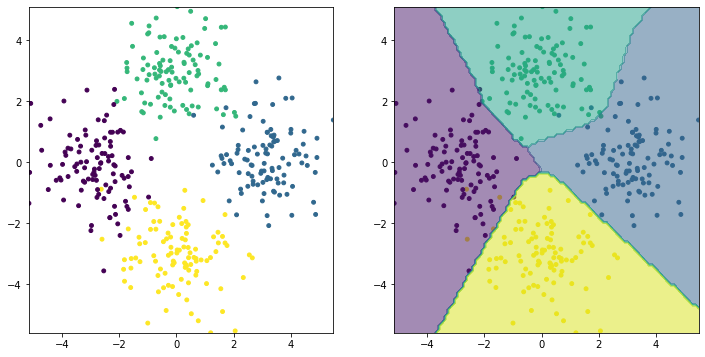

In [8]:
# avaliação via keras
_, accuracy = model.evaluate(x, y_onehot)
print('\033[1m' + 'Accuracy: %.2f' % (accuracy*100) + '\033[0m')
plot.classification_predictions(x, y, is_binary=False, nn=model)

## 2. 4 Multiclasses classification

(100, 2) (100, 1)


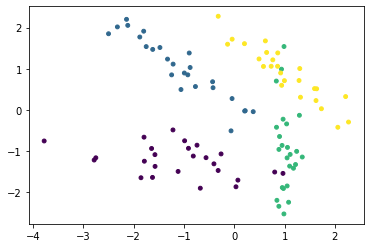

In [9]:
x, y = make_classification(n_samples=100, n_classes=4, n_features=2, n_clusters_per_class=1, n_redundant=0, n_repeated=0, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap=plt.cm.viridis)

In [10]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::10])

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


## 4 Multiclasses classification: minha rede

epoch:    0/2000 loss_train: 2.79975490 + 0.00000000 = 2.79975490 loss_val = 2.79975490
epoch:  500/2000 loss_train: 0.16112619 + 0.00000000 = 0.16112619 loss_val = 0.16112619
epoch: 1000/2000 loss_train: 0.14155435 + 0.00000000 = 0.14155435 loss_val = 0.14155435
epoch: 1500/2000 loss_train: 0.13114227 + 0.00000000 = 0.13114227 loss_val = 0.13114227
epoch: 2000/2000 loss_train: 0.12554046 + 0.00000000 = 0.12554046 loss_val = 0.12554046
Acurácia: 93.00%


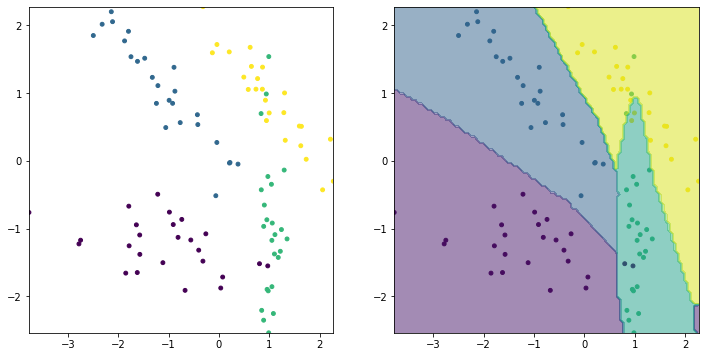

In [11]:
input_dim, output_dim = x.shape[1], y_onehot.shape[1]

#configuração da rede - problema de classificação multiclasse (binary_cross_entropy)
nn = NeuralNetwork(cost_func = rna.softmax_neg_log_likelihood, learning_rate = 1e-1)
nn.layers.append(Layer(input_dim=input_dim, output_dim=10,activation=rna.relu)) # tanh tb serve
nn.layers.append(Layer(input_dim=10, output_dim=10,activation=rna.relu)) # tanh tb serve
nn.layers.append(Layer(input_dim=10, output_dim=output_dim,activation=rna.linear)) 
nn.fit(x, y_onehot, epochs=2000, verbose=500) #porque 10000 epochs ? tentativa e erro !! 

y_pred = np.argmax(nn.predict(x), axis=1)
print('\033[1m' + 'Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)) + '\033[0m')
plot.classification_predictions(x, y, is_binary=False, nn=nn)

## 4 Multiclasses classification: keras

In [12]:
model = Sequential()
model.add(Dense(12, input_dim=input_dim, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(output_dim, activation='softmax'))

In [13]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# fit the keras model on the dataset
model.fit(x, y_onehot, epochs=1500, batch_size=10)

Epoch 1/1500
10/10 [==============================] - 1s 664us/step - loss: 1.3196 - accuracy: 0.2609
Epoch 2/1500
10/10 [==============================] - 0s 887us/step - loss: 1.3005 - accuracy: 0.2603
Epoch 3/1500
10/10 [==============================] - 0s 887us/step - loss: 1.2603 - accuracy: 0.2855
Epoch 4/1500
10/10 [==============================] - 0s 767us/step - loss: 1.1459 - accuracy: 0.3832
Epoch 5/1500
10/10 [==============================] - 0s 779us/step - loss: 1.1353 - accuracy: 0.3576
Epoch 6/1500
10/10 [==============================] - 0s 776us/step - loss: 1.1188 - accuracy: 0.3703
Epoch 7/1500
10/10 [==============================] - 0s 880us/step - loss: 1.0517 - accuracy: 0.4586
Epoch 8/1500
10/10 [==============================] - 0s 776us/step - loss: 1.0328 - accuracy: 0.4968
Epoch 9/1500
10/10 [==============================] - 0s 861us/step - loss: 0.9862 - accuracy: 0.6123
Epoch 10/1500
10/10 [==============================] - 0s 862us/step - loss: 1.001

10/10 [==============================] - 0s 727us/step - loss: 0.3897 - accuracy: 0.8935
Epoch 81/1500
10/10 [==============================] - 0s 769us/step - loss: 0.3037 - accuracy: 0.9042
Epoch 82/1500
10/10 [==============================] - 0s 775us/step - loss: 0.3947 - accuracy: 0.8733
Epoch 83/1500
10/10 [==============================] - 0s 890us/step - loss: 0.3670 - accuracy: 0.9219
Epoch 84/1500
10/10 [==============================] - 0s 890us/step - loss: 0.2878 - accuracy: 0.9482
Epoch 85/1500
10/10 [==============================] - 0s 890us/step - loss: 0.2870 - accuracy: 0.9315
Epoch 86/1500
10/10 [==============================] - 0s 847us/step - loss: 0.2644 - accuracy: 0.9538
Epoch 87/1500
10/10 [==============================] - 0s 997us/step - loss: 0.3407 - accuracy: 0.8997
Epoch 88/1500
10/10 [==============================] - 0s 776us/step - loss: 0.3530 - accuracy: 0.9267
Epoch 89/1500
10/10 [==============================] - 0s 887us/step - loss: 0.2850 - a

10/10 [==============================] - 0s 985us/step - loss: 0.1993 - accuracy: 0.9609
Epoch 159/1500
10/10 [==============================] - 0s 849us/step - loss: 0.2413 - accuracy: 0.9169
Epoch 160/1500
10/10 [==============================] - 0s 776us/step - loss: 0.2211 - accuracy: 0.9287
Epoch 161/1500
10/10 [==============================] - 0s 779us/step - loss: 0.2797 - accuracy: 0.9110
Epoch 162/1500
10/10 [==============================] - 0s 778us/step - loss: 0.2757 - accuracy: 0.9157
Epoch 163/1500
10/10 [==============================] - 0s 779us/step - loss: 0.1839 - accuracy: 0.9521
Epoch 164/1500
10/10 [==============================] - 0s 956us/step - loss: 0.2776 - accuracy: 0.9007
Epoch 165/1500
10/10 [==============================] - 0s 776us/step - loss: 0.2689 - accuracy: 0.9328
Epoch 166/1500
10/10 [==============================] - 0s 768us/step - loss: 0.2718 - accuracy: 0.9033
Epoch 167/1500
10/10 [==============================] - 0s 780us/step - loss: 0

10/10 [==============================] - 0s 781us/step - loss: 0.2020 - accuracy: 0.9273
Epoch 237/1500
10/10 [==============================] - 0s 779us/step - loss: 0.1680 - accuracy: 0.9542
Epoch 238/1500
10/10 [==============================] - 0s 725us/step - loss: 0.2199 - accuracy: 0.9304
Epoch 239/1500
10/10 [==============================] - 0s 779us/step - loss: 0.2069 - accuracy: 0.9153
Epoch 240/1500
10/10 [==============================] - 0s 776us/step - loss: 0.2508 - accuracy: 0.9103
Epoch 241/1500
10/10 [==============================] - 0s 890us/step - loss: 0.2319 - accuracy: 0.9241
Epoch 242/1500
10/10 [==============================] - 0s 887us/step - loss: 0.2575 - accuracy: 0.9152
Epoch 243/1500
10/10 [==============================] - 0s 883us/step - loss: 0.2036 - accuracy: 0.9280
Epoch 244/1500
10/10 [==============================] - 0s 776us/step - loss: 0.2158 - accuracy: 0.9306
Epoch 245/1500
10/10 [==============================] - 0s 774us/step - loss: 0

Epoch 315/1500
10/10 [==============================] - 0s 890us/step - loss: 0.2252 - accuracy: 0.9200
Epoch 316/1500
10/10 [==============================] - 0s 665us/step - loss: 0.1752 - accuracy: 0.9414
Epoch 317/1500
10/10 [==============================] - 0s 669us/step - loss: 0.2370 - accuracy: 0.9180
Epoch 318/1500
10/10 [==============================] - 0s 887us/step - loss: 0.2157 - accuracy: 0.9317
Epoch 319/1500
10/10 [==============================] - 0s 662us/step - loss: 0.1554 - accuracy: 0.9612
Epoch 320/1500
10/10 [==============================] - 0s 854us/step - loss: 0.2170 - accuracy: 0.9322
Epoch 321/1500
10/10 [==============================] - 0s 772us/step - loss: 0.2027 - accuracy: 0.9418
Epoch 322/1500
10/10 [==============================] - 0s 887us/step - loss: 0.1784 - accuracy: 0.9355
Epoch 323/1500
10/10 [==============================] - 0s 668us/step - loss: 0.2583 - accuracy: 0.9086
Epoch 324/1500
10/10 [==============================] - 0s 776us

10/10 [==============================] - 0s 836us/step - loss: 0.1397 - accuracy: 0.9630
Epoch 394/1500
10/10 [==============================] - 0s 997us/step - loss: 0.1412 - accuracy: 0.9654
Epoch 395/1500
10/10 [==============================] - 0s 669us/step - loss: 0.1465 - accuracy: 0.9568
Epoch 396/1500
10/10 [==============================] - 0s 867us/step - loss: 0.1361 - accuracy: 0.9726
Epoch 397/1500
10/10 [==============================] - 0s 888us/step - loss: 0.1526 - accuracy: 0.9625
Epoch 398/1500
10/10 [==============================] - 0s 776us/step - loss: 0.1563 - accuracy: 0.9504
Epoch 399/1500
10/10 [==============================] - 0s 1000us/step - loss: 0.2533 - accuracy: 0.9023
Epoch 400/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.1769 - accuracy: 0.9297
Epoch 401/1500
10/10 [==============================] - 0s 661us/step - loss: 0.1756 - accuracy: 0.9490
Epoch 402/1500
10/10 [==============================] - 0s 996us/step - loss: 0.

10/10 [==============================] - 0s 958us/step - loss: 0.1489 - accuracy: 0.9511
Epoch 473/1500
10/10 [==============================] - 0s 807us/step - loss: 0.1431 - accuracy: 0.9525
Epoch 474/1500
10/10 [==============================] - 0s 984us/step - loss: 0.1466 - accuracy: 0.9365
Epoch 475/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.1437 - accuracy: 0.9604
Epoch 476/1500
10/10 [==============================] - 0s 776us/step - loss: 0.1675 - accuracy: 0.9370
Epoch 477/1500
10/10 [==============================] - 0s 890us/step - loss: 0.1628 - accuracy: 0.9388
Epoch 478/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.9574
Epoch 479/1500
10/10 [==============================] - 0s 996us/step - loss: 0.1530 - accuracy: 0.9552
Epoch 480/1500
10/10 [==============================] - 0s 839us/step - loss: 0.1839 - accuracy: 0.9344
Epoch 481/1500
10/10 [==============================] - 0s 835us/step - loss: 0.137

10/10 [==============================] - 0s 780us/step - loss: 0.2001 - accuracy: 0.9298
Epoch 552/1500
10/10 [==============================] - 0s 781us/step - loss: 0.1131 - accuracy: 0.9705
Epoch 553/1500
10/10 [==============================] - 0s 887us/step - loss: 0.1927 - accuracy: 0.9179
Epoch 554/1500
10/10 [==============================] - 0s 885us/step - loss: 0.1571 - accuracy: 0.9428
Epoch 555/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 0.9422
Epoch 556/1500
10/10 [==============================] - 0s 780us/step - loss: 0.1147 - accuracy: 0.9732
Epoch 557/1500
10/10 [==============================] - 0s 886us/step - loss: 0.1434 - accuracy: 0.9599
Epoch 558/1500
10/10 [==============================] - 0s 890us/step - loss: 0.1339 - accuracy: 0.9589
Epoch 559/1500
10/10 [==============================] - 0s 776us/step - loss: 0.1853 - accuracy: 0.9338
Epoch 560/1500
10/10 [==============================] - 0s 888us/step - loss: 0.1

10/10 [==============================] - 0s 997us/step - loss: 0.1396 - accuracy: 0.9532
Epoch 631/1500
10/10 [==============================] - 0s 890us/step - loss: 0.1630 - accuracy: 0.9311
Epoch 632/1500
10/10 [==============================] - 0s 776us/step - loss: 0.1339 - accuracy: 0.9588
Epoch 633/1500
10/10 [==============================] - 0s 887us/step - loss: 0.1188 - accuracy: 0.9580
Epoch 634/1500
10/10 [==============================] - 0s 890us/step - loss: 0.1296 - accuracy: 0.9631
Epoch 635/1500
10/10 [==============================] - 0s 735us/step - loss: 0.1337 - accuracy: 0.9581
Epoch 636/1500
10/10 [==============================] - 0s 883us/step - loss: 0.1550 - accuracy: 0.9447
Epoch 637/1500
10/10 [==============================] - 0s 914us/step - loss: 0.1285 - accuracy: 0.9502
Epoch 638/1500
10/10 [==============================] - 0s 775us/step - loss: 0.1449 - accuracy: 0.9431
Epoch 639/1500
10/10 [==============================] - 0s 810us/step - loss: 0

10/10 [==============================] - 0s 1ms/step - loss: 0.1705 - accuracy: 0.9316
Epoch 710/1500
10/10 [==============================] - 0s 886us/step - loss: 0.1924 - accuracy: 0.9153
Epoch 711/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.1075 - accuracy: 0.9679
Epoch 712/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.1559 - accuracy: 0.9237
Epoch 713/1500
10/10 [==============================] - 0s 996us/step - loss: 0.1649 - accuracy: 0.9259
Epoch 714/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.1460 - accuracy: 0.9330
Epoch 715/1500
10/10 [==============================] - 0s 997us/step - loss: 0.1152 - accuracy: 0.9676
Epoch 716/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.1876 - accuracy: 0.9179
Epoch 717/1500
10/10 [==============================] - 0s 997us/step - loss: 0.1178 - accuracy: 0.9564
Epoch 718/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.1755 - accu

10/10 [==============================] - 0s 887us/step - loss: 0.1372 - accuracy: 0.9428
Epoch 789/1500
10/10 [==============================] - 0s 776us/step - loss: 0.1156 - accuracy: 0.9563
Epoch 790/1500
10/10 [==============================] - 0s 776us/step - loss: 0.1025 - accuracy: 0.9713
Epoch 791/1500
10/10 [==============================] - 0s 887us/step - loss: 0.1013 - accuracy: 0.9593
Epoch 792/1500
10/10 [==============================] - 0s 886us/step - loss: 0.1118 - accuracy: 0.9622
Epoch 793/1500
10/10 [==============================] - 0s 776us/step - loss: 0.1009 - accuracy: 0.9599
Epoch 794/1500
10/10 [==============================] - 0s 878us/step - loss: 0.1377 - accuracy: 0.9361
Epoch 795/1500
10/10 [==============================] - 0s 773us/step - loss: 0.1246 - accuracy: 0.9521
Epoch 796/1500
10/10 [==============================] - 0s 887us/step - loss: 0.0923 - accuracy: 0.9713
Epoch 797/1500
10/10 [==============================] - 0s 666us/step - loss: 0

Epoch 867/1500
10/10 [==============================] - 0s 868us/step - loss: 0.0888 - accuracy: 0.9639
Epoch 868/1500
10/10 [==============================] - 0s 668us/step - loss: 0.1076 - accuracy: 0.9452
Epoch 869/1500
10/10 [==============================] - 0s 886us/step - loss: 0.1192 - accuracy: 0.9517
Epoch 870/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.1304 - accuracy: 0.9389
Epoch 871/1500
10/10 [==============================] - 0s 997us/step - loss: 0.1502 - accuracy: 0.9217
Epoch 872/1500
10/10 [==============================] - 0s 889us/step - loss: 0.1232 - accuracy: 0.9335
Epoch 873/1500
10/10 [==============================] - 0s 886us/step - loss: 0.0976 - accuracy: 0.9660
Epoch 874/1500
10/10 [==============================] - 0s 887us/step - loss: 0.1175 - accuracy: 0.9529
Epoch 875/1500
10/10 [==============================] - 0s 943us/step - loss: 0.0894 - accuracy: 0.9688
Epoch 876/1500
10/10 [==============================] - 0s 886us/s

10/10 [==============================] - 0s 885us/step - loss: 0.1363 - accuracy: 0.9298
Epoch 947/1500
10/10 [==============================] - 0s 883us/step - loss: 0.1042 - accuracy: 0.9558
Epoch 948/1500
10/10 [==============================] - 0s 775us/step - loss: 0.1105 - accuracy: 0.9430
Epoch 949/1500
10/10 [==============================] - 0s 776us/step - loss: 0.0921 - accuracy: 0.9607
Epoch 950/1500
10/10 [==============================] - 0s 774us/step - loss: 0.0945 - accuracy: 0.9694
Epoch 951/1500
10/10 [==============================] - 0s 887us/step - loss: 0.0843 - accuracy: 0.9778
Epoch 952/1500
10/10 [==============================] - 0s 779us/step - loss: 0.1479 - accuracy: 0.9316
Epoch 953/1500
10/10 [==============================] - 0s 883us/step - loss: 0.1089 - accuracy: 0.9586
Epoch 954/1500
10/10 [==============================] - 0s 855us/step - loss: 0.1034 - accuracy: 0.9611
Epoch 955/1500
10/10 [==============================] - 0s 776us/step - loss: 0

10/10 [==============================] - 0s 776us/step - loss: 0.0732 - accuracy: 0.9729
Epoch 1025/1500
10/10 [==============================] - 0s 899us/step - loss: 0.1018 - accuracy: 0.9563
Epoch 1026/1500
10/10 [==============================] - 0s 887us/step - loss: 0.1295 - accuracy: 0.9327
Epoch 1027/1500
10/10 [==============================] - 0s 779us/step - loss: 0.1258 - accuracy: 0.9283
Epoch 1028/1500
10/10 [==============================] - 0s 775us/step - loss: 0.0818 - accuracy: 0.9657
Epoch 1029/1500
10/10 [==============================] - 0s 887us/step - loss: 0.0927 - accuracy: 0.9656
Epoch 1030/1500
10/10 [==============================] - 0s 919us/step - loss: 0.0787 - accuracy: 0.9784
Epoch 1031/1500
10/10 [==============================] - 0s 886us/step - loss: 0.1089 - accuracy: 0.9522
Epoch 1032/1500
10/10 [==============================] - 0s 996us/step - loss: 0.1066 - accuracy: 0.9575
Epoch 1033/1500
10/10 [==============================] - 0s 887us/step 

10/10 [==============================] - 0s 776us/step - loss: 0.1002 - accuracy: 0.9429
Epoch 1103/1500
10/10 [==============================] - 0s 778us/step - loss: 0.1185 - accuracy: 0.9385
Epoch 1104/1500
10/10 [==============================] - 0s 997us/step - loss: 0.0989 - accuracy: 0.9464
Epoch 1105/1500
10/10 [==============================] - 0s 880us/step - loss: 0.1494 - accuracy: 0.9172
Epoch 1106/1500
10/10 [==============================] - 0s 896us/step - loss: 0.1144 - accuracy: 0.9531
Epoch 1107/1500
10/10 [==============================] - 0s 776us/step - loss: 0.1024 - accuracy: 0.9533
Epoch 1108/1500
10/10 [==============================] - 0s 792us/step - loss: 0.0857 - accuracy: 0.9596
Epoch 1109/1500
10/10 [==============================] - 0s 933us/step - loss: 0.1210 - accuracy: 0.9419
Epoch 1110/1500
10/10 [==============================] - 0s 925us/step - loss: 0.1450 - accuracy: 0.9153
Epoch 1111/1500
10/10 [==============================] - 0s 1ms/step - 

10/10 [==============================] - 0s 844us/step - loss: 0.0999 - accuracy: 0.9535
Epoch 1181/1500
10/10 [==============================] - 0s 983us/step - loss: 0.0843 - accuracy: 0.9717
Epoch 1182/1500
10/10 [==============================] - 0s 964us/step - loss: 0.0991 - accuracy: 0.9527
Epoch 1183/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.1027 - accuracy: 0.9528
Epoch 1184/1500
10/10 [==============================] - 0s 887us/step - loss: 0.1117 - accuracy: 0.9439
Epoch 1185/1500
10/10 [==============================] - 0s 886us/step - loss: 0.1186 - accuracy: 0.9409
Epoch 1186/1500
10/10 [==============================] - 0s 997us/step - loss: 0.1036 - accuracy: 0.9447
Epoch 1187/1500
10/10 [==============================] - 0s 886us/step - loss: 0.0727 - accuracy: 0.9759
Epoch 1188/1500
10/10 [==============================] - 0s 893us/step - loss: 0.0692 - accuracy: 0.9790
Epoch 1189/1500
10/10 [==============================] - 0s 988us/step - 

10/10 [==============================] - 0s 883us/step - loss: 0.0910 - accuracy: 0.9636
Epoch 1259/1500
10/10 [==============================] - 0s 887us/step - loss: 0.0688 - accuracy: 0.9736
Epoch 1260/1500
10/10 [==============================] - 0s 776us/step - loss: 0.1368 - accuracy: 0.9255
Epoch 1261/1500
10/10 [==============================] - 0s 997us/step - loss: 0.0675 - accuracy: 0.9759
Epoch 1262/1500
10/10 [==============================] - 0s 780us/step - loss: 0.0767 - accuracy: 0.9796
Epoch 1263/1500
10/10 [==============================] - 0s 779us/step - loss: 0.0872 - accuracy: 0.9569
Epoch 1264/1500
10/10 [==============================] - 0s 885us/step - loss: 0.0681 - accuracy: 0.9756
Epoch 1265/1500
10/10 [==============================] - 0s 778us/step - loss: 0.0943 - accuracy: 0.9601
Epoch 1266/1500
10/10 [==============================] - 0s 883us/step - loss: 0.0880 - accuracy: 0.9748
Epoch 1267/1500
10/10 [==============================] - 0s 838us/step 

10/10 [==============================] - 0s 887us/step - loss: 0.0871 - accuracy: 0.9611
Epoch 1337/1500
10/10 [==============================] - 0s 895us/step - loss: 0.0856 - accuracy: 0.9649
Epoch 1338/1500
10/10 [==============================] - 0s 889us/step - loss: 0.0944 - accuracy: 0.9580
Epoch 1339/1500
10/10 [==============================] - 0s 718us/step - loss: 0.0871 - accuracy: 0.9621
Epoch 1340/1500
10/10 [==============================] - 0s 903us/step - loss: 0.0593 - accuracy: 0.9883
Epoch 1341/1500
10/10 [==============================] - 0s 828us/step - loss: 0.0924 - accuracy: 0.9558
Epoch 1342/1500
10/10 [==============================] - 0s 776us/step - loss: 0.1058 - accuracy: 0.9405
Epoch 1343/1500
10/10 [==============================] - 0s 999us/step - loss: 0.0575 - accuracy: 0.9775
Epoch 1344/1500
10/10 [==============================] - 0s 772us/step - loss: 0.0975 - accuracy: 0.9470
Epoch 1345/1500
10/10 [==============================] - 0s 780us/step 

10/10 [==============================] - 0s 866us/step - loss: 0.0793 - accuracy: 0.9694
Epoch 1415/1500
10/10 [==============================] - 0s 781us/step - loss: 0.0618 - accuracy: 0.9683
Epoch 1416/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.9502
Epoch 1417/1500
10/10 [==============================] - 0s 862us/step - loss: 0.0710 - accuracy: 0.9655
Epoch 1418/1500
10/10 [==============================] - 0s 889us/step - loss: 0.0635 - accuracy: 0.9727
Epoch 1419/1500
10/10 [==============================] - 0s 997us/step - loss: 0.1185 - accuracy: 0.9296
Epoch 1420/1500
10/10 [==============================] - 0s 852us/step - loss: 0.0821 - accuracy: 0.9627
Epoch 1421/1500
10/10 [==============================] - 0s 779us/step - loss: 0.0736 - accuracy: 0.9648
Epoch 1422/1500
10/10 [==============================] - 0s 883us/step - loss: 0.0689 - accuracy: 0.9725
Epoch 1423/1500
10/10 [==============================] - 0s 776us/step - 

10/10 [==============================] - 0s 876us/step - loss: 0.0580 - accuracy: 0.9766
Epoch 1493/1500
10/10 [==============================] - 0s 910us/step - loss: 0.0729 - accuracy: 0.9636
Epoch 1494/1500
10/10 [==============================] - 0s 997us/step - loss: 0.0803 - accuracy: 0.9526
Epoch 1495/1500
10/10 [==============================] - 0s 997us/step - loss: 0.0896 - accuracy: 0.9394
Epoch 1496/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.9378
Epoch 1497/1500
10/10 [==============================] - 0s 886us/step - loss: 0.0820 - accuracy: 0.9568
Epoch 1498/1500
10/10 [==============================] - 0s 890us/step - loss: 0.1118 - accuracy: 0.9415
Epoch 1499/1500
10/10 [==============================] - 0s 797us/step - loss: 0.0786 - accuracy: 0.9535
Epoch 1500/1500
10/10 [==============================] - 0s 886us/step - loss: 0.0709 - accuracy: 0.9585


4/4 [==============================] - 0s 998us/step - loss: 0.0752 - accuracy: 0.9600
Accuracy: 96.00


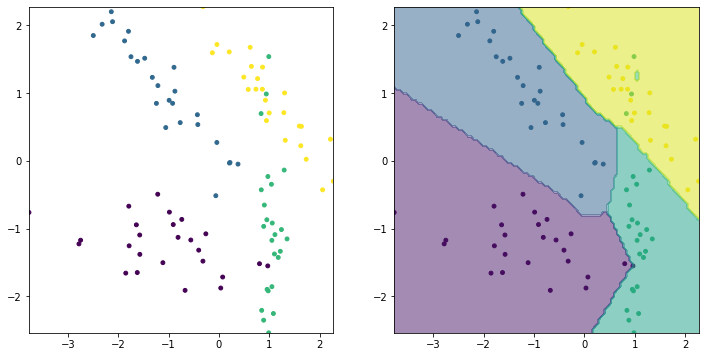

In [15]:
# avaliação via keras
_, accuracy = model.evaluate(x, y_onehot)
print('\033[1m' + 'Accuracy: %.2f' % (accuracy*100) + '\033[0m')
plot.classification_predictions(x, y, is_binary=False, nn=model)

## 3. Iris Dataset

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 2) (150, 1)


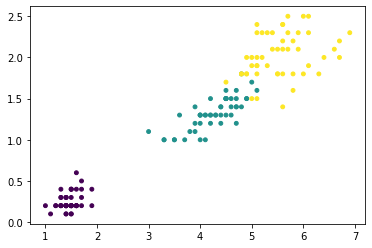

In [16]:
data = load_iris()
x, y = data.data[:, 2:], data.target.reshape(-1,1)

print(data.feature_names)
print(data.target_names)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap=plt.cm.viridis)

In [17]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::20])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


## 3. Iris Dataset: minha rede

epoch:    0/2000 loss_train: 2.12455843 + 0.00000000 = 2.12455843 loss_val = 2.12455843
epoch:  500/2000 loss_train: 0.22000803 + 0.00000000 = 0.22000803 loss_val = 0.22000803
epoch: 1000/2000 loss_train: 0.14681731 + 0.00000000 = 0.14681731 loss_val = 0.14681731
epoch: 1500/2000 loss_train: 0.12318025 + 0.00000000 = 0.12318025 loss_val = 0.12318025
epoch: 2000/2000 loss_train: 0.11255476 + 0.00000000 = 0.11255476 loss_val = 0.11255476
Accuracy: 96.00


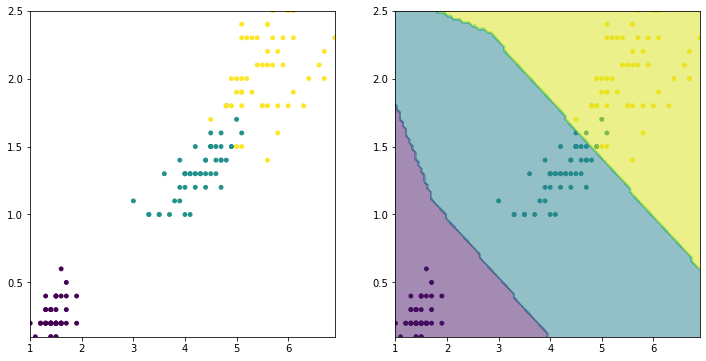

In [18]:
input_dim, output_dim = x.shape[1], y_onehot.shape[1]
#configuração da rede - problema de classificação multiclasse (binary_cross_entropy)
#o uso de lr decay fez a rede aprender mais rápido, 600 epochs atingiu > 96%
#nn = NeuralNetwork(cost_func = softmax_neg_log_likelihood, learning_rate = 1e-1)
nn = NeuralNetwork(cost_func = rna.softmax_neg_log_likelihood, learning_rate = 1e-1,lr_decay_method = rna.exponential_decay, lr_decay_rate=1.0, lr_decay_steps=10)
nn.layers.append(Layer(input_dim=input_dim, output_dim=5,activation=rna.relu)) # relu ou tanh 
nn.layers.append(Layer(input_dim=5, output_dim=output_dim,activation=rna.linear)) 
nn.fit(x, y_onehot, epochs=2000, verbose=500,batch_gen= rna.batch_sequential, batch_size = 10) 
y_pred = np.argmax(nn.predict(x), axis=1)
print('\033[1m' + 'Accuracy: %.2f' % (accuracy*100) + '\033[0m')

plot.classification_predictions(x, y, is_binary=False, nn=nn)

## 3. Iris Dataset: keras

In [19]:
model = Sequential()
model.add(Dense(12, input_dim=input_dim, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(output_dim, activation='softmax'))

In [20]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# fit the keras model on the dataset
model.fit(x, y_onehot, epochs=1500, batch_size=10)

Epoch 1/1500
15/15 [==============================] - 1s 853us/step - loss: 1.9211 - accuracy: 0.3884
Epoch 2/1500
15/15 [==============================] - 0s 855us/step - loss: 1.8518 - accuracy: 0.3196
Epoch 3/1500
15/15 [==============================] - 0s 997us/step - loss: 1.5952 - accuracy: 0.3461
Epoch 4/1500
15/15 [==============================] - 0s 1ms/step - loss: 1.4404 - accuracy: 0.3479
Epoch 5/1500
15/15 [==============================] - 0s 1ms/step - loss: 1.3138 - accuracy: 0.3755
Epoch 6/1500
15/15 [==============================] - 0s 928us/step - loss: 1.2615 - accuracy: 0.2962
Epoch 7/1500
15/15 [==============================] - 0s 854us/step - loss: 1.1689 - accuracy: 0.2256
Epoch 8/1500
15/15 [==============================] - 0s 716us/step - loss: 1.0862 - accuracy: 0.4121
Epoch 9/1500
15/15 [==============================] - 0s 845us/step - loss: 1.0418 - accuracy: 0.3700
Epoch 10/1500
15/15 [==============================] - 0s 984us/step - loss: 1.0012 - 

15/15 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.9411
Epoch 82/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.3528 - accuracy: 0.9607
Epoch 83/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.9647
Epoch 84/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.3281 - accuracy: 0.9716
Epoch 85/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.3413 - accuracy: 0.9393
Epoch 86/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.3102 - accuracy: 0.9579
Epoch 87/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.9200
Epoch 88/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.3087 - accuracy: 0.9325
Epoch 89/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.9175
Epoch 90/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.2962 - accuracy: 0.9549
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.9665
Epoch 162/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9531
Epoch 163/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9384
Epoch 164/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.9327
Epoch 165/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.1726 - accuracy: 0.9679
Epoch 166/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.9563
Epoch 167/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.9583
Epoch 168/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.1497 - accuracy: 0.9720
Epoch 169/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.1747 - accuracy: 0.9682
Epoch 170/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.1769 - accuracy: 0.

15/15 [==============================] - 0s 907us/step - loss: 0.1205 - accuracy: 0.9818
Epoch 241/1500
15/15 [==============================] - 0s 783us/step - loss: 0.1572 - accuracy: 0.9494
Epoch 242/1500
15/15 [==============================] - 0s 785us/step - loss: 0.1337 - accuracy: 0.9731
Epoch 243/1500
15/15 [==============================] - 0s 820us/step - loss: 0.1583 - accuracy: 0.9552
Epoch 244/1500
15/15 [==============================] - 0s 800us/step - loss: 0.1303 - accuracy: 0.9657
Epoch 245/1500
15/15 [==============================] - 0s 942us/step - loss: 0.1339 - accuracy: 0.9799
Epoch 246/1500
15/15 [==============================] - 0s 825us/step - loss: 0.1600 - accuracy: 0.9557
Epoch 247/1500
15/15 [==============================] - 0s 926us/step - loss: 0.1553 - accuracy: 0.9641
Epoch 248/1500
15/15 [==============================] - 0s 824us/step - loss: 0.0988 - accuracy: 0.9751
Epoch 249/1500
15/15 [==============================] - 0s 851us/step - loss: 0

Epoch 319/1500
15/15 [==============================] - 0s 997us/step - loss: 0.0948 - accuracy: 0.9837
Epoch 320/1500
15/15 [==============================] - 0s 997us/step - loss: 0.1206 - accuracy: 0.9602
Epoch 321/1500
15/15 [==============================] - 0s 856us/step - loss: 0.1293 - accuracy: 0.9610
Epoch 322/1500
15/15 [==============================] - 0s 855us/step - loss: 0.0796 - accuracy: 0.9888
Epoch 323/1500
15/15 [==============================] - 0s 784us/step - loss: 0.0946 - accuracy: 0.9842
Epoch 324/1500
15/15 [==============================] - 0s 759us/step - loss: 0.1207 - accuracy: 0.9637
Epoch 325/1500
15/15 [==============================] - 0s 713us/step - loss: 0.0957 - accuracy: 0.9825
Epoch 326/1500
15/15 [==============================] - 0s 875us/step - loss: 0.1114 - accuracy: 0.9718
Epoch 327/1500
15/15 [==============================] - 0s 781us/step - loss: 0.1262 - accuracy: 0.9566
Epoch 328/1500
15/15 [==============================] - 0s 855us

Epoch 398/1500
15/15 [==============================] - 0s 784us/step - loss: 0.1077 - accuracy: 0.9646
Epoch 399/1500
15/15 [==============================] - 0s 859us/step - loss: 0.1291 - accuracy: 0.9392
Epoch 400/1500
15/15 [==============================] - 0s 778us/step - loss: 0.0837 - accuracy: 0.9681
Epoch 401/1500
15/15 [==============================] - 0s 784us/step - loss: 0.0974 - accuracy: 0.9645
Epoch 402/1500
15/15 [==============================] - 0s 926us/step - loss: 0.1435 - accuracy: 0.9357
Epoch 403/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9778
Epoch 404/1500
15/15 [==============================] - 0s 962us/step - loss: 0.1062 - accuracy: 0.9468
Epoch 405/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0975 - accuracy: 0.9726
Epoch 406/1500
15/15 [==============================] - 0s 934us/step - loss: 0.0885 - accuracy: 0.9691
Epoch 407/1500
15/15 [==============================] - 0s 999us/ste

15/15 [==============================] - 0s 852us/step - loss: 0.1060 - accuracy: 0.9361
Epoch 478/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.1115 - accuracy: 0.9475
Epoch 479/1500
15/15 [==============================] - 0s 853us/step - loss: 0.0780 - accuracy: 0.9830
Epoch 480/1500
15/15 [==============================] - 0s 894us/step - loss: 0.1033 - accuracy: 0.9530
Epoch 481/1500
15/15 [==============================] - 0s 931us/step - loss: 0.0789 - accuracy: 0.9688
Epoch 482/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0898 - accuracy: 0.9574
Epoch 483/1500
15/15 [==============================] - 0s 951us/step - loss: 0.0773 - accuracy: 0.9574
Epoch 484/1500
15/15 [==============================] - 0s 777us/step - loss: 0.0821 - accuracy: 0.9654
Epoch 485/1500
15/15 [==============================] - 0s 651us/step - loss: 0.1094 - accuracy: 0.9398
Epoch 486/1500
15/15 [==============================] - 0s 784us/step - loss: 0.087

15/15 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9304
Epoch 557/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9651
Epoch 558/1500
15/15 [==============================] - 0s 999us/step - loss: 0.1038 - accuracy: 0.9399
Epoch 559/1500
15/15 [==============================] - 0s 914us/step - loss: 0.0920 - accuracy: 0.9476
Epoch 560/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0878 - accuracy: 0.9535
Epoch 561/1500
15/15 [==============================] - 0s 992us/step - loss: 0.1117 - accuracy: 0.9348
Epoch 562/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0677 - accuracy: 0.9651
Epoch 563/1500
15/15 [==============================] - 0s 855us/step - loss: 0.0829 - accuracy: 0.9775
Epoch 564/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0718 - accuracy: 0.9686
Epoch 565/1500
15/15 [==============================] - 0s 997us/step - loss: 0.0760 - ac

15/15 [==============================] - 0s 926us/step - loss: 0.0762 - accuracy: 0.9617
Epoch 635/1500
15/15 [==============================] - 0s 928us/step - loss: 0.0591 - accuracy: 0.9781
Epoch 636/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9574
Epoch 637/1500
15/15 [==============================] - 0s 855us/step - loss: 0.1083 - accuracy: 0.9341
Epoch 638/1500
15/15 [==============================] - 0s 763us/step - loss: 0.0697 - accuracy: 0.9701
Epoch 639/1500
15/15 [==============================] - 0s 790us/step - loss: 0.0854 - accuracy: 0.9535
Epoch 640/1500
15/15 [==============================] - 0s 763us/step - loss: 0.0995 - accuracy: 0.9407
Epoch 641/1500
15/15 [==============================] - 0s 798us/step - loss: 0.0859 - accuracy: 0.9517
Epoch 642/1500
15/15 [==============================] - 0s 926us/step - loss: 0.1182 - accuracy: 0.9323
Epoch 643/1500
15/15 [==============================] - 0s 855us/step - loss: 0.0

15/15 [==============================] - 0s 811us/step - loss: 0.0894 - accuracy: 0.9411
Epoch 713/1500
15/15 [==============================] - 0s 715us/step - loss: 0.0730 - accuracy: 0.9650
Epoch 714/1500
15/15 [==============================] - 0s 717us/step - loss: 0.0947 - accuracy: 0.9360
Epoch 715/1500
15/15 [==============================] - 0s 855us/step - loss: 0.1006 - accuracy: 0.9455
Epoch 716/1500
15/15 [==============================] - 0s 790us/step - loss: 0.0785 - accuracy: 0.9522
Epoch 717/1500
15/15 [==============================] - 0s 750us/step - loss: 0.0990 - accuracy: 0.9584
Epoch 718/1500
15/15 [==============================] - 0s 712us/step - loss: 0.0825 - accuracy: 0.9555
Epoch 719/1500
15/15 [==============================] - 0s 795us/step - loss: 0.1026 - accuracy: 0.9389
Epoch 720/1500
15/15 [==============================] - 0s 830us/step - loss: 0.0724 - accuracy: 0.9606
Epoch 721/1500
15/15 [==============================] - 0s 784us/step - loss: 0

Epoch 791/1500
15/15 [==============================] - 0s 860us/step - loss: 0.0542 - accuracy: 0.9781
Epoch 792/1500
15/15 [==============================] - 0s 889us/step - loss: 0.0876 - accuracy: 0.9424
Epoch 793/1500
15/15 [==============================] - 0s 855us/step - loss: 0.0612 - accuracy: 0.9757
Epoch 794/1500
15/15 [==============================] - 0s 847us/step - loss: 0.0613 - accuracy: 0.9719
Epoch 795/1500
15/15 [==============================] - 0s 846us/step - loss: 0.0826 - accuracy: 0.9495
Epoch 796/1500
15/15 [==============================] - 0s 860us/step - loss: 0.0840 - accuracy: 0.9612
Epoch 797/1500
15/15 [==============================] - 0s 779us/step - loss: 0.0599 - accuracy: 0.9701
Epoch 798/1500
15/15 [==============================] - 0s 839us/step - loss: 0.0725 - accuracy: 0.9655
Epoch 799/1500
15/15 [==============================] - 0s 926us/step - loss: 0.0688 - accuracy: 0.9623
Epoch 800/1500
15/15 [==============================] - 0s 928us

15/15 [==============================] - 0s 855us/step - loss: 0.0865 - accuracy: 0.9389
Epoch 870/1500
15/15 [==============================] - 0s 855us/step - loss: 0.1288 - accuracy: 0.8973
Epoch 871/1500
15/15 [==============================] - 0s 712us/step - loss: 0.0800 - accuracy: 0.9568
Epoch 872/1500
15/15 [==============================] - 0s 842us/step - loss: 0.0906 - accuracy: 0.9464
Epoch 873/1500
15/15 [==============================] - 0s 850us/step - loss: 0.0697 - accuracy: 0.9560
Epoch 874/1500
15/15 [==============================] - 0s 735us/step - loss: 0.0690 - accuracy: 0.9713
Epoch 875/1500
15/15 [==============================] - 0s 851us/step - loss: 0.0718 - accuracy: 0.9646
Epoch 876/1500
15/15 [==============================] - 0s 775us/step - loss: 0.0956 - accuracy: 0.9411
Epoch 877/1500
15/15 [==============================] - 0s 783us/step - loss: 0.0925 - accuracy: 0.9456
Epoch 878/1500
15/15 [==============================] - 0s 855us/step - loss: 0

15/15 [==============================] - 0s 1ms/step - loss: 0.0826 - accuracy: 0.9667
Epoch 949/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0712 - accuracy: 0.9717
Epoch 950/1500
15/15 [==============================] - 0s 997us/step - loss: 0.0830 - accuracy: 0.9498
Epoch 951/1500
15/15 [==============================] - 0s 998us/step - loss: 0.0601 - accuracy: 0.9735
Epoch 952/1500
15/15 [==============================] - 0s 853us/step - loss: 0.0632 - accuracy: 0.9739
Epoch 953/1500
15/15 [==============================] - 0s 997us/step - loss: 0.0601 - accuracy: 0.9685
Epoch 954/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0651 - accuracy: 0.9642
Epoch 955/1500
15/15 [==============================] - 0s 855us/step - loss: 0.0913 - accuracy: 0.9443
Epoch 956/1500
15/15 [==============================] - 0s 851us/step - loss: 0.0849 - accuracy: 0.9497
Epoch 957/1500
15/15 [==============================] - 0s 910us/step - loss: 0.1295 

15/15 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9696
Epoch 1028/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9721
Epoch 1029/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9672
Epoch 1030/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9594
Epoch 1031/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0566 - accuracy: 0.9819
Epoch 1032/1500
15/15 [==============================] - 0s 990us/step - loss: 0.0876 - accuracy: 0.9547
Epoch 1033/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0874 - accuracy: 0.9492
Epoch 1034/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0782 - accuracy: 0.9596
Epoch 1035/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0672 - accuracy: 0.9671
Epoch 1036/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0718 - a

15/15 [==============================] - 0s 926us/step - loss: 0.0826 - accuracy: 0.9507
Epoch 1107/1500
15/15 [==============================] - 0s 892us/step - loss: 0.0860 - accuracy: 0.9489
Epoch 1108/1500
15/15 [==============================] - 0s 930us/step - loss: 0.0700 - accuracy: 0.9742
Epoch 1109/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9786
Epoch 1110/1500
15/15 [==============================] - 0s 997us/step - loss: 0.0605 - accuracy: 0.9681
Epoch 1111/1500
15/15 [==============================] - 0s 899us/step - loss: 0.0614 - accuracy: 0.9663
Epoch 1112/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0595 - accuracy: 0.9708
Epoch 1113/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0758 - accuracy: 0.9521
Epoch 1114/1500
15/15 [==============================] - 0s 914us/step - loss: 0.0739 - accuracy: 0.9590
Epoch 1115/1500
15/15 [==============================] - 0s 784us/step - loss

15/15 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9626
Epoch 1185/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9752
Epoch 1186/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0802 - accuracy: 0.9518
Epoch 1187/1500
15/15 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 1.00 - 0s 1ms/step - loss: 0.0628 - accuracy: 0.9679
Epoch 1188/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.1077 - accuracy: 0.9303
Epoch 1189/1500
15/15 [==============================] - 0s 967us/step - loss: 0.0528 - accuracy: 0.9668
Epoch 1190/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9715
Epoch 1191/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9802
Epoch 1192/1500
15/15 [==============================] - 0s 787us/step - loss: 0.1011 - accuracy: 0.9393
Epoch 1193/1500
15/15 [====================

15/15 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9763
Epoch 1263/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9603
Epoch 1264/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9498
Epoch 1265/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 0.9336
Epoch 1266/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.0588 - accuracy: 0.9658
Epoch 1267/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9554
Epoch 1268/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 0.9561
Epoch 1269/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.9695
Epoch 1270/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.0714 - accuracy: 0.9517
Epoch 1271/1500
15/15 [==============================] - 0s 2ms/step - loss: 0.0838 - acc

15/15 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9647
Epoch 1342/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0636 - accuracy: 0.9725
Epoch 1343/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0877 - accuracy: 0.9470
Epoch 1344/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9753
Epoch 1345/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9774
Epoch 1346/1500
15/15 [==============================] - 0s 996us/step - loss: 0.0818 - accuracy: 0.9484
Epoch 1347/1500
15/15 [==============================] - 0s 933us/step - loss: 0.0704 - accuracy: 0.9693
Epoch 1348/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0835 - accuracy: 0.9454
Epoch 1349/1500
15/15 [==============================] - 0s 986us/step - loss: 0.0889 - accuracy: 0.9439
Epoch 1350/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0722

15/15 [==============================] - 0s 937us/step - loss: 0.0739 - accuracy: 0.9556
Epoch 1420/1500
15/15 [==============================] - 0s 855us/step - loss: 0.0844 - accuracy: 0.9533
Epoch 1421/1500
15/15 [==============================] - 0s 791us/step - loss: 0.0726 - accuracy: 0.9630
Epoch 1422/1500
15/15 [==============================] - 0s 861us/step - loss: 0.0845 - accuracy: 0.9536
Epoch 1423/1500
15/15 [==============================] - 0s 926us/step - loss: 0.0925 - accuracy: 0.9420
Epoch 1424/1500
15/15 [==============================] - 0s 894us/step - loss: 0.0649 - accuracy: 0.9680
Epoch 1425/1500
15/15 [==============================] - 0s 866us/step - loss: 0.0877 - accuracy: 0.9404
Epoch 1426/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.9358
Epoch 1427/1500
15/15 [==============================] - 0s 929us/step - loss: 0.0853 - accuracy: 0.9547
Epoch 1428/1500
15/15 [==============================] - 0s 1ms/step - lo

15/15 [==============================] - 0s 971us/step - loss: 0.0884 - accuracy: 0.9469
Epoch 1498/1500
15/15 [==============================] - 0s 1ms/step - loss: 0.0489 - accuracy: 0.9767
Epoch 1499/1500
15/15 [==============================] - 0s 995us/step - loss: 0.0908 - accuracy: 0.9429
Epoch 1500/1500
15/15 [==============================] - 0s 995us/step - loss: 0.0989 - accuracy: 0.9354


5/5 [==============================] - 0s 997us/step - loss: 0.0702 - accuracy: 0.9600
Accuracy: 96.00


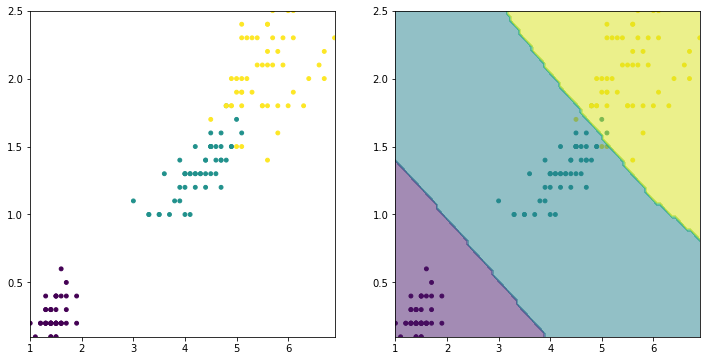

In [22]:
# avaliação via keras
_, accuracy = model.evaluate(x, y_onehot)
print('\033[1m' + 'Accuracy: %.2f' % (accuracy*100) + '\033[0m')

plot.classification_predictions(x, y, is_binary=False, nn=model)

# 2. Datasets da literatura

__ref 1.__ https://doi.org/10.1016/j.catena.2019.104240

__ref 2.__ http://www.sciencedirect.com/science/article/pii/S2352914817301405

__ref 3.__ https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [24]:
APP_PATH = os.getcwd()

#dataset = pd.read_csv(os.path.join(APP_PATH, os.path.join("data", "Input_POA.csv"))) #Input_POA  diabetes spc_data_landslides
dataset = pd.read_csv(os.path.join(APP_PATH, os.path.join("data", "ptos_aleatorios_shuffled.csv"))) 
#dataset = pd.read_csv(os.path.join(APP_PATH, os.path.join("data", "pima-indians-diabetes.data.csv"))) #Input_POA  diabetes spc_data_landslides
#dataset = pd.read_csv(os.path.join(APP_PATH, os.path.join("data", "diabetes.csv"))) #Input_POA  diabetes spc_data_landslides

# load the dataset
dataset

,FID,X,Y,TWI,Curvatura,Declividade,Elevacao,Aspecto,Geologia,Uso,class
0,98,381913.2155,7358368.235,27.338095,0.002735,27.338095,120.943680,330.186584,65,90,0
1,152,375711.0000,7348857.000,5.155329,0.006004,24.772690,17.397917,113.472549,2,20,1
2,95,383008.5927,7357558.608,24.757074,0.000368,24.757074,207.428345,121.768433,65,90,0
3,106,371074.0000,7345111.000,6.688554,-0.010576,29.801399,15.330963,71.881042,2,20,1
4,82,375019.5230,7353140.890,0.221845,-0.000012,0.221845,2.162373,185.550385,2,70,0
...,...,...,...,...,...,...,...,...,...,...,...
195,176,380247.0000,7355075.000,3.111852,0.009217,65.807915,183.386307,335.578705,65,90,1
196,25,371328.0618,7346102.434,34.884327,-0.003104,34.884327,76.214539,335.742798,2,90,0
197,47,375938.4356,7349522.181,16.367725,0.009234,16.367725,99.617256,167.967239,2,90,0
198,87,379277.9602,7354447.102,30.434063,0.000543,30.434063,226.055237,155.315613,65,90,0


In [25]:
dataset.rename(columns={'TWI': 'twi','Curvatura': 'curv', 'Declividade': 'slope','Elevacao': 'elevation','Aspecto': 'aspect', 'Geologia': 'lito', 'Uso': 'uso_solo'}, inplace=True)
dataset = dataset[['slope','aspect','elevation','uso_solo','lito','twi','curv','class']]
dataset.head(5)

,slope,aspect,elevation,uso_solo,lito,twi,curv,class
0,27.338095,330.186584,120.943680,90,65,27.338095,0.002735,0
1,24.772690,113.472549,17.397917,20,2,5.155329,0.006004,1
2,24.757074,121.768433,207.428345,90,65,24.757074,0.000368,0
3,29.801399,71.881042,15.330963,20,2,6.688554,-0.010576,1
4,0.221845,185.550385,2.162373,70,2,0.221845,-0.000012,0


In [26]:
# split data into X and y
X = dataset.drop('class',axis=1)
y= dataset['class']
#X

In [27]:
X = X.to_numpy()    #converte dataframe em array
y = y.to_numpy()    #converte dataframe em array
y = y.reshape(-1,1) #reorganiza o array em um array 1 x 1
print(X.shape, y.shape)

(200, 7) (200, 1)


In [28]:
minmax = MinMaxScaler(feature_range=(-1, 1))
X = minmax.fit_transform(X.astype(np.float64))
print(X.min(axis=0), X.max(axis=0))

[-1. -1. -1. -1. -1. -1. -1.] [1. 1. 1. 1. 1. 1. 1.]


In [29]:
# split data into training and testing sets
seed = 7
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# split into input (X) and output (y) variables
#X = dataset[:,0:8]
#y = dataset[:,8]

In [30]:
input_dim, output_dim = X_train.shape[1], y_train.shape[1]

## __Proposta de análise de importancia das features baseado na variância.__

- Essa proposta é somente compatível com ANN do Keras
- Variance-based Feature Importance in Neural Networks / Deep Learning
- ref.1: https://link.springer.com/chapter/10.1007/978-3-030-33778-0_24
-        https://github.com/rebelosa/feature-importance-neural-networks

In [31]:
import keras as keras
class VarImpVIANN(keras.callbacks.Callback):
    def __init__(self, verbose=0):
        self.verbose = verbose
        self.n = 0
        self.M2 = 0.0

    def on_train_begin(self, logs={}, verbose = 1):
        if self.verbose:
            print("VIANN version 1.0 (Wellford + Mean) update per epoch")
        self.diff = self.model.layers[0].get_weights()[0]
        
    def on_epoch_end(self, batch, logs={}):
        currentWeights = self.model.layers[0].get_weights()[0]
        
        self.n += 1
        delta = np.subtract(currentWeights, self.diff)
        self.diff += delta/self.n
        delta2 = np.subtract(currentWeights, self.diff)
        self.M2 += delta*delta2
            
        self.lastweights = self.model.layers[0].get_weights()[0]

    def on_train_end(self, batch, logs={}):
        if self.n < 2:
            self.s2 = float('nan')
        else:
            self.s2 = self.M2 / (self.n - 1)
        
        scores = np.sum(np.multiply(self.s2, np.abs(self.lastweights)), axis = 1)
        
        self.varScores = (scores - min(scores)) / (max(scores) - min(scores))
        if self.verbose:
            print("Most important variables: ",
                  np.array(self.varScores).argsort()[-10:][::-1])

## 2.1 Datasets da literatura: minha rede

In [32]:
#configuração da rede - problema de classificação binária (binary_cross_entropy)
#nn = NeuralNetwork(cost_func = binary_cross_entropy, learning_rate = 6*1e-1) # da Lucimara
#lr_decay_method só atrapalhou..
#patience = early stopping
neurons = 20
num_learning_rate = 0.01
num_batch_size = 8
nn = NeuralNetwork(cost_func = rna.binary_cross_entropy, learning_rate = num_learning_rate, patience=50) 
nn.layers.append(Layer(input_dim=input_dim, output_dim=20,activation= rna.relu, weights_initializer=rna.glorot_normal))

nn.layers.append(Layer(input_dim=neurons, output_dim=neurons, dropout_prob = 0.25,activation=rna.relu,weights_initializer=rna.glorot_normal,biases_initializer=rna.glorot_normal)) # tanh tb serve leaky_relu ou relu ou elu
nn.layers.append(Layer(input_dim=neurons, output_dim=neurons, dropout_prob = 0.25, activation=rna.relu,weights_initializer=rna.glorot_normal,biases_initializer=rna.glorot_normal)) # tanh tb serve leaky_relu ou relu ou elu

nn.layers.append(Layer(input_dim=neurons, output_dim=output_dim,activation=rna.sigmoid,weights_initializer=rna.glorot_normal))

In [33]:
#nn.fit(X_train, y_train, epochs=200, verbose=20) # da Lucimara
nn.fit(X_train, y_train, epochs=30000,batch_gen= rna.batch_shuffle, batch_size=num_batch_size, verbose=3000)

epoch:    0/30000 loss_train: 1.00431257 + 0.00000000 = 1.00431257 loss_val = 1.00431257
epoch: 3000/30000 loss_train: 0.05395059 + 0.00000000 = 0.05395059 loss_val = 0.05395059


In [34]:
X_test.shape

(60, 7)

In [35]:
#Avaliação rede Caio
y_pred = nn.predict(X_test)
print('\033[1m' + 'Acurácia: {:.2f}%'.format(100*accuracy_score(y_test, y_pred > 0.5)) + '\033[0m') 

Acurácia: 95.00%


## 2.2 Datasets da literatura: keras

In [36]:
VIANN = VarImpVIANN(verbose=1)
model = Sequential()
model.add(Dense(12, input_dim=input_dim, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=1500, batch_size=10,verbose=1, callbacks = [VIANN])

VIANN version 1.0 (Wellford + Mean) update per epoch
Epoch 1/1500
14/14 [==============================] - 2s 1ms/step - loss: 0.7628 - accuracy: 0.4723
Epoch 2/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.7206 - accuracy: 0.4887
Epoch 3/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.7034 - accuracy: 0.5206
Epoch 4/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.4369
Epoch 5/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.4890
Epoch 6/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.5296
Epoch 7/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.6042
Epoch 8/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.6105 - accuracy: 0.7746
Epoch 9/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.6201 - accuracy: 0.7332
Epoch 10/1500
14/14 [==========================

14/14 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 0.9832
Epoch 81/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0770 - accuracy: 0.9820
Epoch 82/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0829 - accuracy: 0.9770
Epoch 83/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0989 - accuracy: 0.9660
Epoch 84/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0834 - accuracy: 0.9800
Epoch 85/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0627 - accuracy: 0.9933
Epoch 86/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9829
Epoch 87/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0782 - accuracy: 0.9753
Epoch 88/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0577 - accuracy: 0.9961
Epoch 89/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 0.9884
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0784 - accuracy: 0.9746
Epoch 161/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9842
Epoch 162/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9747
Epoch 163/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0646 - accuracy: 0.9852
Epoch 164/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9882
Epoch 165/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0367 - accuracy: 0.9854
Epoch 166/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0596 - accuracy: 0.9871
Epoch 167/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.9933
Epoch 168/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0660 - accuracy: 0.9942
Epoch 169/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.

14/14 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.9777
Epoch 241/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.9967
Epoch 242/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.9869
Epoch 243/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.9880
Epoch 244/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0582 - accuracy: 0.9722
Epoch 245/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0262 - accuracy: 0.9980
Epoch 246/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.9660
Epoch 247/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0345 - accuracy: 0.9921
Epoch 248/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0384 - accuracy: 0.9816
Epoch 249/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 0.

14/14 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 0.9869
Epoch 321/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9960
Epoch 322/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9869
Epoch 323/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.9904
Epoch 324/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0328 - accuracy: 0.9960
Epoch 325/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9812
Epoch 326/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9796
Epoch 327/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0122 - accuracy: 0.9970
Epoch 328/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9932
Epoch 329/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0255 - accuracy: 0.

14/14 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9886
Epoch 401/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9877
Epoch 402/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 0.9720
Epoch 403/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9730
Epoch 404/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9884
Epoch 405/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 0.9974
Epoch 406/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9801
Epoch 407/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.9882
Epoch 408/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9869
Epoch 409/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.

14/14 [==============================] - 0s 1ms/step - loss: 0.0108 - accuracy: 0.9967
Epoch 481/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 0.9967
Epoch 482/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0100 - accuracy: 0.9951
Epoch 483/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0107 - accuracy: 0.9990
Epoch 484/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 0.9967
Epoch 485/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.9985
Epoch 486/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.9951
Epoch 487/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.9942
Epoch 488/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0114 - accuracy: 0.9916
Epoch 489/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.

14/14 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 561/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 562/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 563/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 564/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 565/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 0.9990
Epoch 566/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0137 - accuracy: 0.9985
Epoch 567/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 1.0000
Epoch 568/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 0.9951
Epoch 569/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 0.

14/14 [==============================] - 0s 1ms/step - loss: 0.0102 - accuracy: 0.9980
Epoch 641/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 642/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 643/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 644/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 645/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 646/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 647/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 648/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 649/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 1.

14/14 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 721/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 722/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 723/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 724/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 725/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 726/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 727/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 728/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 729/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 1.

14/14 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 801/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 802/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 803/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 804/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 805/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 806/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 807/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 808/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 809/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.

14/14 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 881/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 882/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 883/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 884/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 885/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 886/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 887/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 888/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 889/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.

14/14 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 961/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 962/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 963/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 964/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 965/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 966/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 967/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 968/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 969/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.

14/14 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1041/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 1042/1500
14/14 [==============================] - 0s 2ms/step - loss: 7.9288e-04 - accuracy: 1.0000
Epoch 1043/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 1044/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 1045/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 1046/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 1047/1500
14/14 [==============================] - 0s 1ms/step - loss: 8.2330e-04 - accuracy: 1.0000
Epoch 1048/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1049/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.00

14/14 [==============================] - 0s 2ms/step - loss: 9.1258e-04 - accuracy: 1.0000
Epoch 1120/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 1121/1500
14/14 [==============================] - 0s 1ms/step - loss: 8.9261e-04 - accuracy: 1.0000
Epoch 1122/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 1123/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 1124/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 1125/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1126/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1127/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 1128/1500
14/14 [==============================] - 0s 2ms/step - loss: 9.83

14/14 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 1198/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1199/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1200/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1201/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1202/1500
14/14 [==============================] - 0s 2ms/step - loss: 7.6951e-04 - accuracy: 1.0000
Epoch 1203/1500
14/14 [==============================] - 0s 2ms/step - loss: 9.9306e-04 - accuracy: 1.0000
Epoch 1204/1500
14/14 [==============================] - 0s 1ms/step - loss: 4.1976e-04 - accuracy: 1.0000
Epoch 1205/1500
14/14 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1206/1500
14/14 [==============================] - 0s 1ms/step - loss: 

14/14 [==============================] - 0s 2ms/step - loss: 6.2865e-04 - accuracy: 1.0000
Epoch 1275/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 1276/1500
14/14 [==============================] - 0s 2ms/step - loss: 4.0985e-04 - accuracy: 1.0000
Epoch 1277/1500
14/14 [==============================] - 0s 2ms/step - loss: 4.0408e-04 - accuracy: 1.0000
Epoch 1278/1500
14/14 [==============================] - 0s 1ms/step - loss: 2.8981e-04 - accuracy: 1.0000
Epoch 1279/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1280/1500
14/14 [==============================] - 0s 1ms/step - loss: 6.0000e-04 - accuracy: 1.0000
Epoch 1281/1500
14/14 [==============================] - 0s 1ms/step - loss: 7.0334e-04 - accuracy: 1.0000
Epoch 1282/1500
14/14 [==============================] - 0s 1ms/step - loss: 7.2228e-04 - accuracy: 1.0000
Epoch 1283/1500
14/14 [==============================] - 0s 1

14/14 [==============================] - 0s 908us/step - loss: 5.7924e-04 - accuracy: 1.0000
Epoch 1351/1500
14/14 [==============================] - 0s 1ms/step - loss: 3.7805e-04 - accuracy: 1.0000
Epoch 1352/1500
14/14 [==============================] - 0s 913us/step - loss: 3.3486e-04 - accuracy: 1.0000
Epoch 1353/1500
14/14 [==============================] - 0s 1ms/step - loss: 2.8214e-04 - accuracy: 1.0000
Epoch 1354/1500
14/14 [==============================] - 0s 1ms/step - loss: 8.5352e-04 - accuracy: 1.0000
Epoch 1355/1500
14/14 [==============================] - 0s 1ms/step - loss: 6.4297e-04 - accuracy: 1.0000
Epoch 1356/1500
14/14 [==============================] - 0s 1ms/step - loss: 3.0628e-04 - accuracy: 1.0000
Epoch 1357/1500
14/14 [==============================] - 0s 1ms/step - loss: 4.7601e-04 - accuracy: 1.0000
Epoch 1358/1500
14/14 [==============================] - 0s 983us/step - loss: 3.2431e-04 - accuracy: 1.0000
Epoch 1359/1500
14/14 [========================

14/14 [==============================] - 0s 2ms/step - loss: 2.1783e-04 - accuracy: 1.0000
Epoch 1425/1500
14/14 [==============================] - 0s 1ms/step - loss: 2.9144e-04 - accuracy: 1.0000
Epoch 1426/1500
14/14 [==============================] - 0s 1ms/step - loss: 2.5547e-04 - accuracy: 1.0000
Epoch 1427/1500
14/14 [==============================] - 0s 863us/step - loss: 2.5332e-04 - accuracy: 1.0000
Epoch 1428/1500
14/14 [==============================] - 0s 997us/step - loss: 9.0823e-04 - accuracy: 1.0000
Epoch 1429/1500
14/14 [==============================] - 0s 887us/step - loss: 7.2211e-04 - accuracy: 1.0000
Epoch 1430/1500
14/14 [==============================] - 0s 932us/step - loss: 0.0040 - accuracy: 0.9985
Epoch 1431/1500
14/14 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 0.9980
Epoch 1432/1500
14/14 [==============================] - 0s 973us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1433/1500
14/14 [==============================] 

14/14 [==============================] - 0s 997us/step - loss: 2.2748e-04 - accuracy: 1.0000
Epoch 1500/1500
14/14 [==============================] - 0s 997us/step - loss: 1.9543e-04 - accuracy: 1.0000
Most important variables:  [5 0 4 1 2 6 3]


In [39]:
# avaliação via keras
_, accuracy = model.evaluate(X_test, y_test)
print('\033[1m' + 'Accuracy: %.2f' % (accuracy*100) + '\033[0m')

2/2 [==============================] - 0s 4ms/step - loss: 1.0015 - accuracy: 0.9500
Accuracy: 95.00


In [ ]:
print(VIANN.varScores)